<a href="https://colab.research.google.com/github/riotrip/ml-smt5/blob/main/TG1_2_3_JS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rio Tri Prayogo - 2341720236 - TI 3F/25**
---
## **JS13 - Artificial Neural Network**

### **Tugas Lab**

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktivasi
- ANN diimplementasikan dengan menggunakan tensorflow.

**Langkah 1 - Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from skimage.feature import hog
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

**Langkah 2 - Load Dataset**

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(f"Training data shape: {X_train_full.shape}")
print(f"Training labels shape: {y_train_full.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


**Langkah 3 - Pra Pengolahan**

In [4]:
def preprocess_mnist(X, y):
    X_normalized = X.astype('float32') / 255.0

    X_processed = X_normalized

    y_binary = (y >= 5).astype(int)

    return X_processed, y_binary

In [5]:
X_train_img, y_train = preprocess_mnist(X_train_full, y_train_full)
X_test_img, y_test = preprocess_mnist(X_test, y_test)

**Langkah 4 - Ekstraksi Fitur**

In [6]:
def extract_hog_mnist(X_imgs):
    feats = []
    for img in X_imgs:
        hog_feat = hog(img,
                       orientations=9,
                       pixels_per_cell=(4,4),
                       cells_per_block=(2,2),
                       block_norm='L2-Hys',
                       visualize=False,
                       feature_vector=True)
        feats.append(hog_feat)
    return np.array(feats)

In [7]:
X_train_feat = extract_hog_mnist(X_train_img[:10000])
y_train = y_train[:10000]
X_test_feat = extract_hog_mnist(X_test_img[:2000])
y_test = y_test[:2000]

**Langkah 5 - Standardisasi Fitur**

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled = scaler.transform(X_test_feat)

**Langkah 6 - Buat Data Latih dan Validasi**

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [10]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test_scaled.shape}, y_test: {y_test.shape}")

X_train: (8000, 1296), y_train: (8000,)
X_val: (2000, 1296), y_val: (2000,)
X_test: (2000, 1296), y_test: (2000,)


**Langkah 7 - Buat Model ANN**

In [11]:
input_dim = X_train.shape[1]

model = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       166,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,337 (681.00 KB)

 Trainable params: 174,337 (681.00 KB)

 Non-trainable params: 0 (0.00 B)

**Langkah 8 - Latih Model**

In [12]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8732 - loss: 0.3137 - val_accuracy: 0.9615 - val_loss: 0.1019
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9765 - loss: 0.0733 - val_accuracy: 0.9695 - val_loss: 0.0934
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9838 - loss: 0.0442 - val_accuracy: 0.9695 - val_loss: 0.0857
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0343 - val_accuracy: 0.9740 - val_loss: 0.0873
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9893 - loss: 0.0273 - val_accuracy: 0.9740 - val_loss: 0.0861
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9923 - loss: 0.0213 - val_accuracy: 0.9745 - val_loss: 0.0910
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9935 - loss: 0.0201 - val_accuracy: 0.9730 - val_loss: 0.0999
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9933 - loss: 0.0188 - val_accuracy: 0.

**Langkah 9 - Evaluasi Model dengan Data Test**

In [13]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Akurasi Test: {test_acc:.4f}")

Akurasi Test: 0.9670


**Langkah 10 - Buat Laporan Performansi Model**

In [14]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1052
           1       0.97      0.96      0.97       948

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


Confusion Matrix:
[[1021   31]
 [  35  913]]


**Langkah 11 - Visualisasi Proses Training**

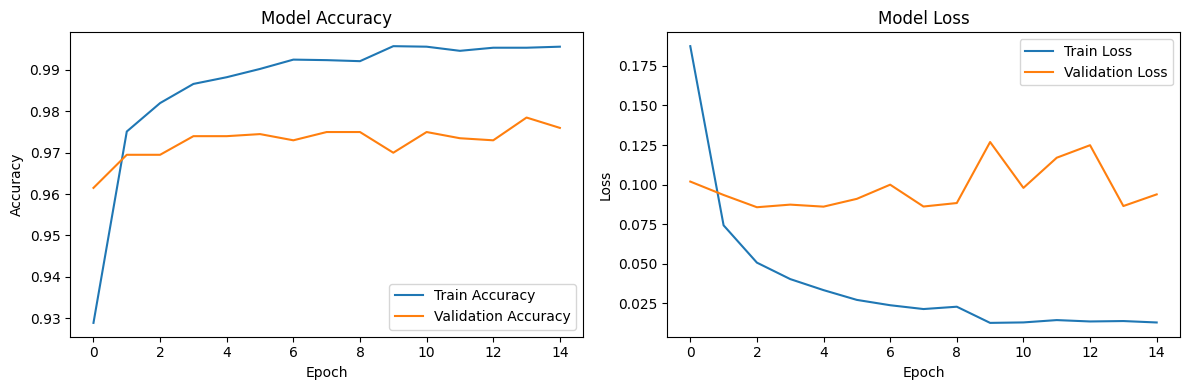

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

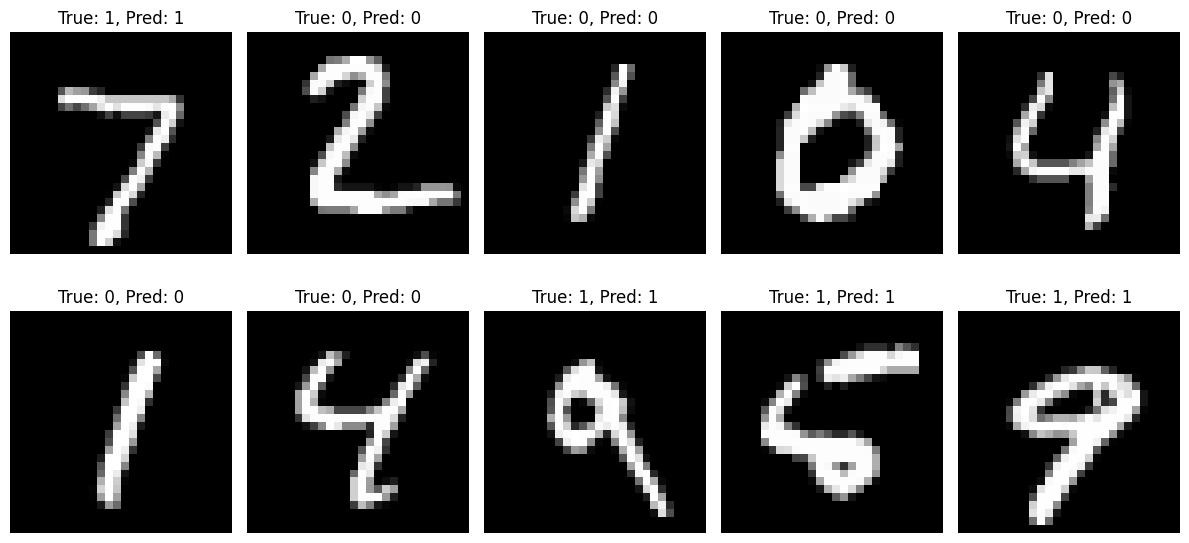

In [16]:
# Visualisasi beberapa contoh data
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test_img[i], cmap='gray')
    plt.title(f'True: {y_test[i]}, Pred: {y_pred[i][0]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

**Langkah 12 - Simpan Model**

In [17]:
model.save('mnist_binary_classifier_model.h5')